In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
from time import time
import torch
from grid_sampling_functionalities import GridSampling3D, spherical_to_cartesian, sample_data
from mpl_toolkits.mplot3d import Axes3D
from thinning_strategies import thin_all_species, thin_majority_species
from grid_sampling_functionalities import sample_data

In [3]:
po_dataset_path = "/shares/wegner.ics.uzh/glc23_data/Presences_only_train.csv"
po_dataset = pd.read_csv(po_dataset_path, sep=";")

In [11]:
grid_size = 1
dataset = po_dataset.copy()
radius_earth = 6731
# Extract longitude and latitude from the DataFrame
lon = dataset['lon'].values
lat = dataset['lat'].values

# Convert spherical coordinates to Cartesian coordinates
x, y, z = spherical_to_cartesian(lon, lat, radius_earth)

coordinates = torch.stack(
        [torch.tensor(x), torch.tensor(y), torch.tensor(z)],
        dim=1
    )

sampler = GridSampling3D(grid_size)
indices, cluster_density = sampler(coordinates)

In [3]:
species_data = po_dataset[po_dataset["speciesId"] == 1995].copy()
species_thinned_data, cluster_density = sample_data(species_data, 1)
s1 = pd.Series(index=species_data.index, data=cluster_density, name='cluster_density_1995')

In [5]:
species_data = po_dataset[po_dataset["speciesId"] == 729].copy()
species_thinned_data, cluster_density = sample_data(species_data, 1)
s2 = pd.Series(index=species_data.index, data=cluster_density, name='cluster_density_729')

In [6]:
df = po_dataset[po_dataset["speciesId"].isin([1995, 729])].copy()

In [7]:
densities = pd.concat([s1, s2])

In [8]:
len(set(df.index).intersection(set(densities.index)))

9095

In [9]:
densities.values

array([1, 1, 1, ..., 1, 1, 1])

In [10]:
sampled_species_counts = df["speciesId"].value_counts()
                
class_weights =  [
    1/sampled_species_counts[i] for i in\
    df["speciesId"].values
]

In [11]:
data_train = df.merge(right=densities.rename("cluster_density"), right_index=True, left_index=True)
cluster_density = data_train["cluster_density"].values

In [12]:
class_weights/cluster_density

array([0.00021993, 0.00021993, 0.00021993, ..., 0.00021988, 0.00021988,
       0.00021988])

In [ ]:
assert(len(data_train)==len(cluster_density))
assert(len(set(data_train.index)-set(cluster_density.index))==0)

data_train = data_train.merge(
    cluster_density.rename("cluster_density"),
    left_index=True,
    right_index=True
)

cluster_density = data_train["cluster_density"].values
assert(len(class_weights)==len(cluster_density))

sample_weights = class_weights/cluster_density

In [4]:
df = po_dataset.head(1000000)
data, cluster_densities = thin_all_species(df, thin_dist=2)

Start thinning of 5930 species...
Thinned speciesId 200/5930 in 0.0077 seconds.
Thinned speciesId 400/5930 in 0.0022 seconds.
Thinned speciesId 600/5930 in 0.002 seconds.
Thinned speciesId 800/5930 in 0.0056 seconds.
Thinned speciesId 1000/5930 in 0.0033 seconds.
Thinned speciesId 1200/5930 in 0.0016 seconds.
Thinned speciesId 1400/5930 in 0.0014 seconds.
Thinned speciesId 1600/5930 in 0.0015 seconds.
Thinned speciesId 1800/5930 in 0.0018 seconds.
Thinned speciesId 2000/5930 in 0.0016 seconds.
Thinned speciesId 2200/5930 in 0.0015 seconds.
Thinned speciesId 2400/5930 in 0.0034 seconds.
Thinned speciesId 2600/5930 in 0.0039 seconds.
Thinned speciesId 2800/5930 in 0.0016 seconds.
Thinned speciesId 3000/5930 in 0.0023 seconds.
Thinned speciesId 3200/5930 in 0.0021 seconds.
Thinned speciesId 3400/5930 in 0.0013 seconds.
Thinned speciesId 3600/5930 in 0.0015 seconds.
Thinned speciesId 3800/5930 in 0.0014 seconds.
Thinned speciesId 4000/5930 in 0.0017 seconds.
Thinned speciesId 4200/5930 in 

In [5]:
data_maj, cluster_densities_maj = thin_majority_species(df)

Start thinning of 1488 majority species...
Thinned species 100/1488)
Thinned species 200/1488)
Thinned species 300/1488)
Thinned species 400/1488)
Thinned species 500/1488)
Thinned species 600/1488)
Thinned species 700/1488)
Thinned species 800/1488)
Thinned species 900/1488)
Thinned species 1000/1488)
Thinned species 1100/1488)
Thinned species 1200/1488)
Thinned species 1300/1488)
Thinned species 1400/1488)
Completed thinning the data in 7.3902 s.


In [6]:
cluster_densities_maj

14        1
44        1
49        1
75        1
76        1
         ..
904163    2
904171    2
913071    1
960528    1
993103    1
Length: 929698, dtype: int64

In [8]:
df = po_dataset.head(1000000)


In [19]:
df = po_dataset.copy()
data_maj, cluster_densities_maj = thin_majority_species(df, thin_dist=5)

Start thinning of 3077 majority species...
Thinned species 100/3077)
Thinned species 200/3077)
Thinned species 300/3077)
Thinned species 400/3077)
Thinned species 500/3077)
Thinned species 600/3077)
Thinned species 700/3077)
Thinned species 800/3077)
Thinned species 900/3077)
Thinned species 1000/3077)
Thinned species 1100/3077)
Thinned species 1200/3077)
Thinned species 1300/3077)
Thinned species 1400/3077)
Thinned species 1500/3077)
Thinned species 1600/3077)
Thinned species 1700/3077)
Thinned species 1800/3077)
Thinned species 1900/3077)
Thinned species 2000/3077)
Thinned species 2100/3077)
Thinned species 2200/3077)
Thinned species 2300/3077)
Thinned species 2400/3077)
Thinned species 2500/3077)
Thinned species 2600/3077)
Thinned species 2700/3077)
Thinned species 2800/3077)
Thinned species 2900/3077)
Thinned species 3000/3077)
Completed thinning the data in 46.6381 s.


In [15]:
ff = df.merge(
cluster_densities_maj.rename("cluster_density"),
left_index=True,
right_index=True,
how="left"
                )

In [18]:
ff["cluster_density"].fillna(1).isnull().sum()

0

In [23]:
len(data)

877789

In [24]:
len(data_maj)

886420

In [25]:
len(df)

1000000

In [14]:
cluster_densities_maj

4389736    1
4728921    1
1879529    1
4893325    1
4487643    1
          ..
3457773    6
1598698    1
2339314    1
1700806    1
1420282    2
Length: 916718, dtype: int64

In [28]:
len(cluster_densities_maj) + len(data_maj)

1803565

In [16]:
len(data_maj)

886627

In [17]:
len(data)

910981

In [27]:
len(cluster_densities)

1000000

In [7]:
data_maj

,glcID,gbifID,observer,datasetName,date,dayOfYear,year,lon,lat,x_EPSG3035,y_EPSG3035,geoUncertaintyInM,speciesId,patchID,timeSerieID
98094,1220433,3.951650e+09,NaN,Pl@ntNet automatic,2018-03-07,66,2018,-5.925807,36.65711,2896148.0,1658310.0,10.0,3007,3114069,96294
54578,3784431,2.836625e+09,NaN,Observation.org,2018-04-01,91,2018,-8.100728,37.25391,2719114.0,1765972.0,25.0,3007,3072126,54310
37647,12626,3.399277e+09,maria oct,iNaturalist RG,2021-10-27,300,2021,-8.564983,37.33362,2680817.0,1784441.0,4.0,3007,3055537,37707
406918,3636531,3.124537e+09,atalanta43,iNaturalist RG,2021-04-20,110,2021,-2.162528,37.34617,3239860.0,1671750.0,88.0,3007,3402709,385120
125871,450524,3.090525e+09,Carlos Bernal,iNaturalist RG,2021-04-02,92,2021,-4.885698,38.18803,3017035.0,1806051.0,59.0,3007,3141143,123358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2982794,1558270,2.851196e+09,Annie Evankow,iNaturalist RG,2020-08-15,228,2020,9.638341,62.29903,4302156.0,4355306.0,5.0,6641,5621357,2597313
1821331,2668836,1.949297e+09,Solbjørg Engen Torvik,NOR Species Observation,2018-10-01,274,2018,5.973303,59.02464,4089408.0,3998082.0,10.0,646,4758736,1735601
3569856,1102347,2.248003e+09,Kåre Arnstein Lye [1940-2021];John Sandve,NOR Species Observation,2019-05-22,142,2019,10.863810,59.07302,4370642.0,3997208.0,20.0,5818,5950963,2928214
4538246,4568827,3.952017e+09,NaN,Pl@ntNet automatic,2020-06-28,180,2020,15.761770,38.26065,4828246.0,1705655.0,24.5,1058,6686847,3665864


In [19]:
cluster2.unique(return_counts=True)

(tensor([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
          14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
          28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
          42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
          56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
          70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
          84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
          98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
         112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
         126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
         140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
         154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
         168, 169, 170, 171, 172, 173, 174, 175, 176

In [14]:
cluster2.min()

tensor(0)

In [ ]:
cluster.max()

In [15]:
cluster.max()

tensor(22613267726)

In [9]:
len(cluster2)

1000

In [ ]:
# Plot original coordinates
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(coordinates[:, 0], coordinates[:, 1], coordinates[:, 2], c='b', label='Original Coordinates')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

# Plot processed coordinates
ax.scatter(processed_coordinates[:, 0], processed_coordinates[:, 1], processed_coordinates[:, 2], c='r', label='Processed Coordinates')
ax.legend()

plt.show()

# Per species

In [7]:
from grid_sampling_functionalities import sample_data
from shapely.geometry import Point
import geopandas as gpd

In [8]:
grid_size = 50
radius_earth = 6371
speciesid = 1995

data = po_dataset.loc[po_dataset["speciesId"]==speciesid].copy()
data.drop_duplicates(subset=['x_EPSG3035', 'y_EPSG3035'], inplace=True)

data['geometry'] = [Point(x, y) for x, y in zip(data['x_EPSG3035'], data['y_EPSG3035'])]
gdata = gpd.GeoDataFrame(data, geometry='geometry', crs='EPSG:3035')

processed_data = sample_data(gdata, grid_size, radius_earth)

ValueError: too many values to unpack (expected 4)

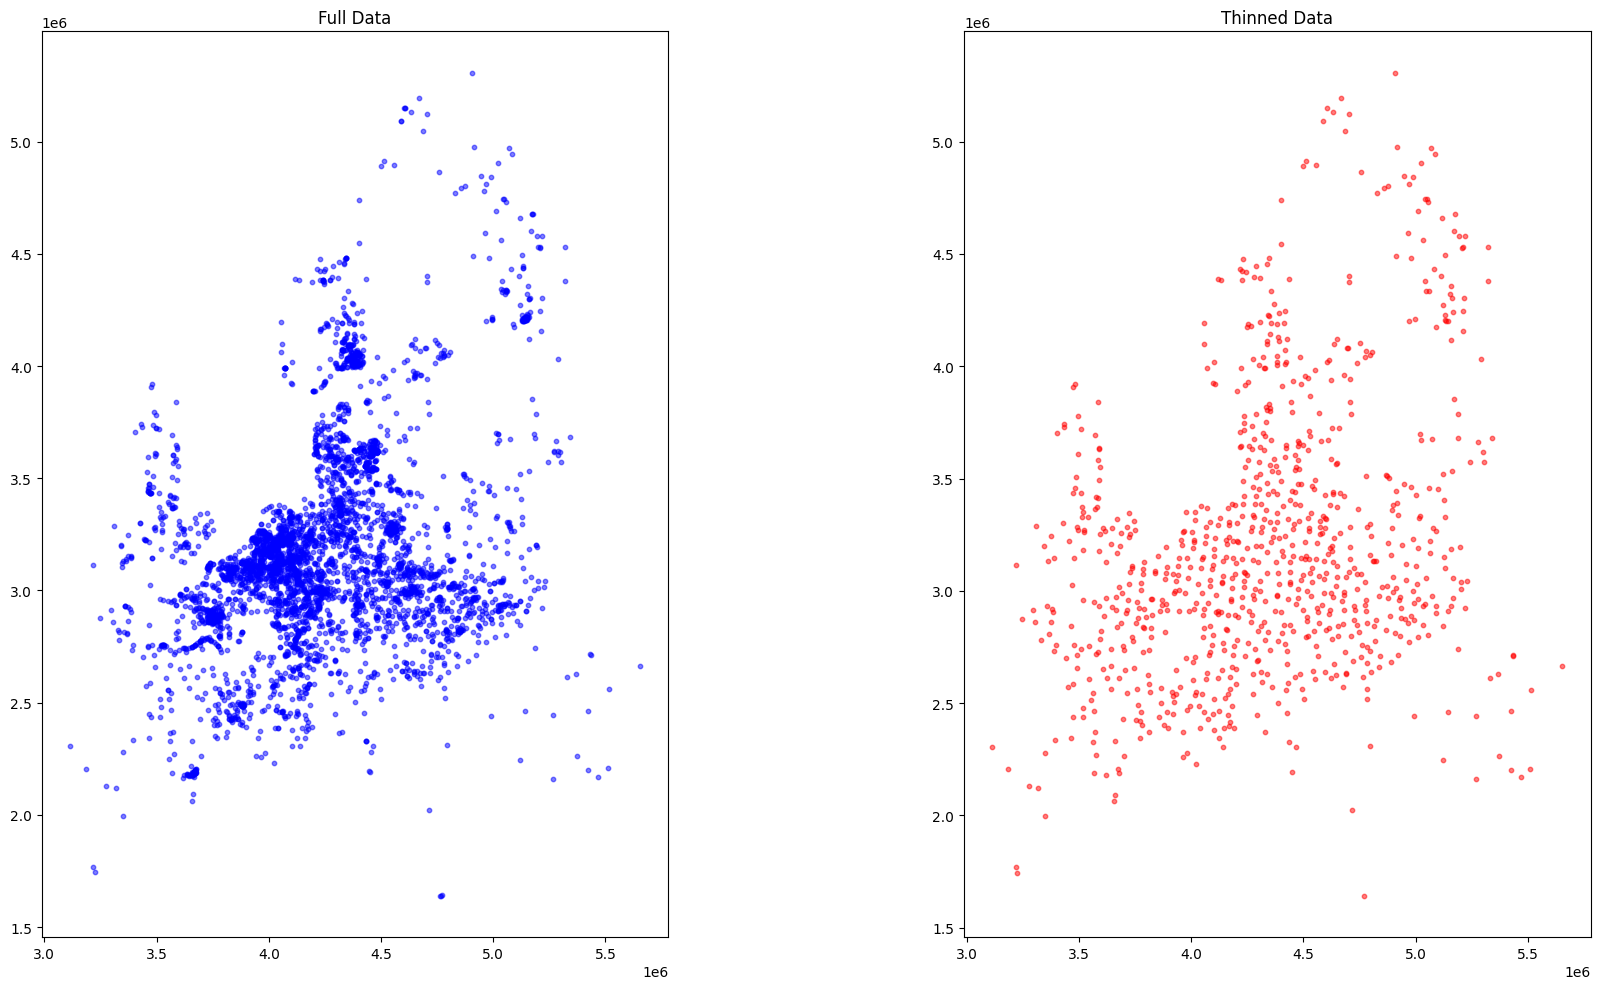

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Plot all points in the GeoDataFrame on the first subplot
gdata.plot(ax=axs[0], markersize=10, color='blue', alpha=0.5, label='full data')
axs[0].set_title('Full Data')

# Plot points for the specific species ID on the second subplot
processed_data.plot(ax=axs[1], markersize=10, color='red', alpha=0.5, label='thinned data')
axs[1].set_title('Thinned Data')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()